In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### Importing and Checking the dataset

In [5]:
train_data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [6]:
train_data.shape

(1628, 29)

In [7]:
test_data.shape

(470, 28)

In [8]:
train_data.isnull().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

### Data Cleaning

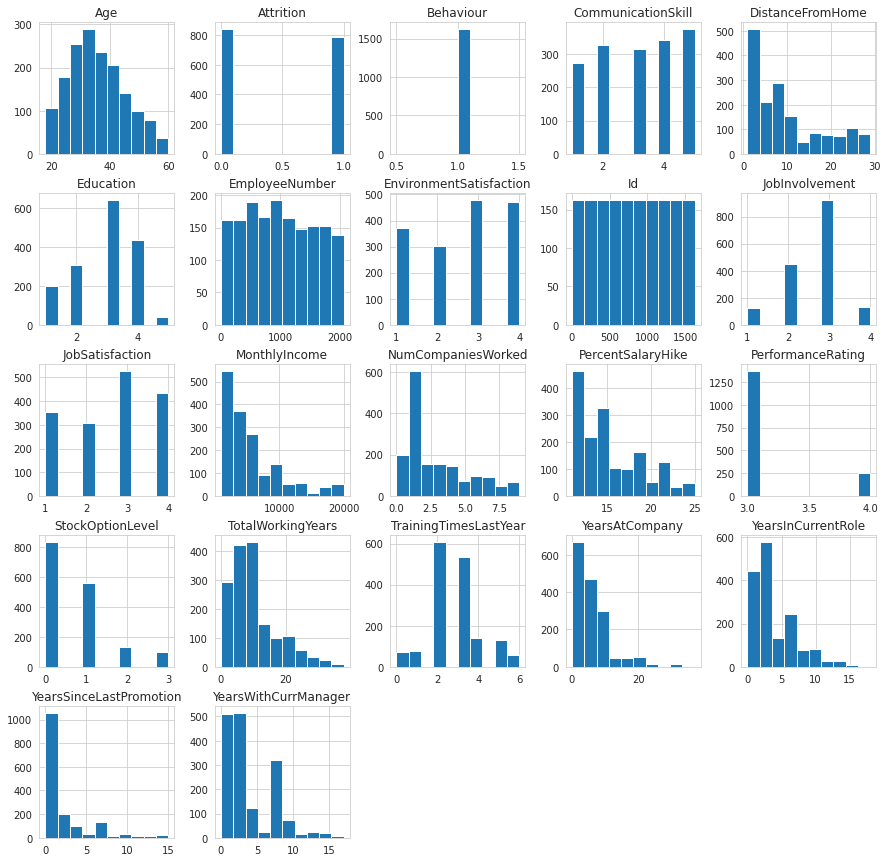

In [9]:
train_data.hist(figsize=(15,15))
plt.show()

In [12]:
#Notice that behaviour has only a single value so dropping that and Id as well from test and train
train_data.drop(columns=['Id','Behaviour'], inplace=True)
test_data.drop(columns=['Id','Behaviour'], inplace=True)

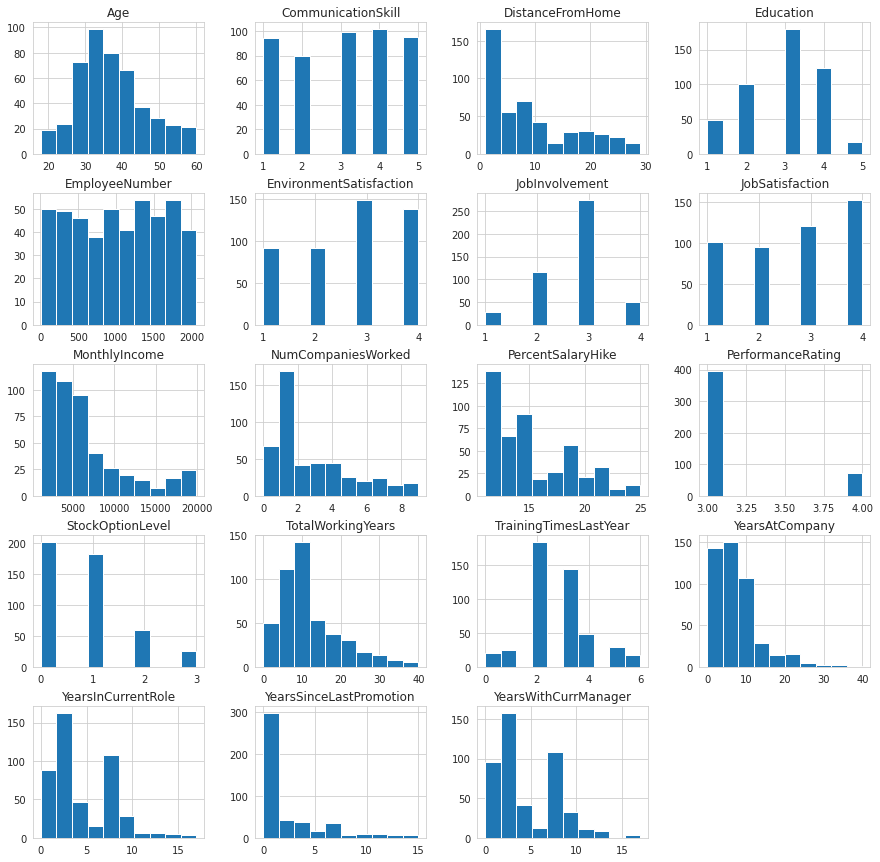

In [19]:
test_data.hist(figsize=(15,15))
plt.show()

In [20]:
#Performance Rating has only values 3 and 4, lets map it to 0 and 1
train_data.PerformanceRating = train_data.PerformanceRating.apply(lambda x: 1 if x == 4 else 0)
test_data.PerformanceRating = test_data.PerformanceRating.apply(lambda x: 1 if x == 4 else 0)

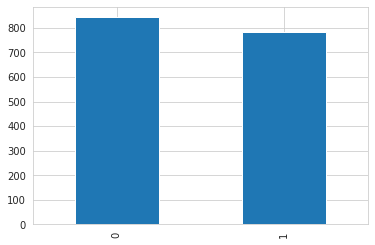

In [21]:
train_data.Attrition.value_counts().plot(kind = 'bar')

In [ ]:
#It is a balanced target variable

In [23]:
#hecking for dublicates
train_data.duplicated().sum()

628

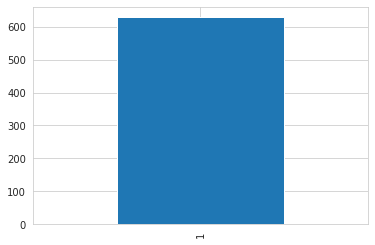

In [24]:
train_data[train_data.duplicated()]['Attrition'].value_counts().plot(kind = 'bar')

In [ ]:
#all the duplicate values are from 1 attrition, therefore it is not a balanced target varaible

In [25]:
train_data.drop_duplicates(inplace=True)
print('The shape of the train data after removal of duplicates is', train_data.shape)

The shape of the train data after removal of duplicates is (1000, 27)


In [26]:
X  = train_data.drop(columns='Attrition')
y = train_data['Attrition']

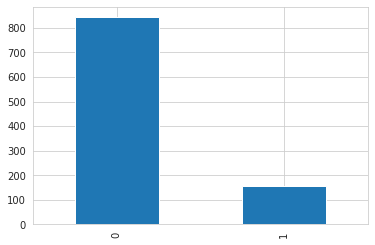

In [29]:
y.value_counts().plot(kind = 'bar')

In [ ]:
#The target column is unbalanced. 

In [87]:
#Importing all the necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import  SVC
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.pipeline import make_pipeline

In [31]:
#will use a cross validation strategy, stratified k-fold which keeps the distribution of target variable similar across the folds.
skf  = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [36]:
categorical = train_data.select_dtypes(include='O')
categorical.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Non-Travel,Research & Development,Medical,Female,Laboratory Technician,Single,No
1,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Married,Yes
2,Travel_Rarely,Sales,Medical,Male,Sales Executive,Single,No
3,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Single,No
4,Travel_Rarely,Research & Development,Other,Male,Manufacturing Director,Married,No


In [39]:
for value in categorical:
    print(value,len(categorical[value].unique()))

BusinessTravel 3
Department 3
EducationField 6
Gender 2
JobRole 9
MaritalStatus 3
OverTime 2


In [ ]:
#All can be onehotencoded as have less number of unique variables

In [79]:
categorical_col = [f for f in X.columns if X[f].dtype == object]
numeric_col = [f for f in X.columns if f not in categorical_col]

In [90]:
categorical_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [96]:
numeric_col

['Age',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'CommunicationSkill']

### Using ColumnTransformer

In [106]:
#chaining steps
prepro_pipe = make_column_transformer((OneHotEncoder(),categorical_col),(StandardScaler(),numeric_col), remainder = 'passthrough')

In [94]:
prepro_pipe.fit_transform(X)

array([[ 1.        ,  0.        ,  0.        , ...,  1.20315251,
         0.81789663,  0.67857037],
       [ 0.        ,  0.        ,  1.        , ..., -0.36019535,
        -0.85014545, -0.73659203],
       [ 0.        ,  0.        ,  1.        , ...,  1.51582208,
        -0.29413142,  1.38615156],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.57781337,
         0.81789663,  0.67857037],
       [ 0.        ,  0.        ,  1.        , ..., -0.67286492,
        -1.12815246,  1.38615156],
       [ 0.        ,  1.        ,  0.        , ...,  1.20315251,
         2.2079317 , -0.02901083]])

In [84]:
pipe_rf = make_pipeline(prepro_pipe, RandomForestClassifier())
print('RF:', np.mean(cross_val_score(estimator = pipe_rf,X = X, y=y,cv = skf, scoring='roc_auc')))

RF: 0.80312631302521


In [86]:
pipe_xg  = make_pipeline(prepro_pipe, XGBClassifier())
print('XGB:', np.mean(cross_val_score(estimator = pipe_xg,X = X, y=y,cv = skf, scoring='roc_auc')))

XGB: 0.8007300420168069


In [89]:
pipe_svc  = make_pipeline(prepro_pipe, SVC(probability=True))
print('SVC:', np.mean(cross_val_score(estimator = pipe_svc,X = X, y=y,cv = skf, scoring='roc_auc')))

SVC: 0.8262127100840336


In [95]:
prepro_pipe.fit_transform(X).shape

(1000, 47)

### PCA

In [ ]:
#SVC performs the best here lets move on to PCA as total columns are 47

In [107]:
#PCA
pipe_svc_pca = make_pipeline(prepro_pipe, PCA(n_components=47), SVC(probability=True))
print('SVC with pca :', np.mean(cross_val_score(estimator = pipe_svc_pca,X = X, y=y,cv = skf, scoring='roc_auc')))

SVC with pca : 0.824378676470588


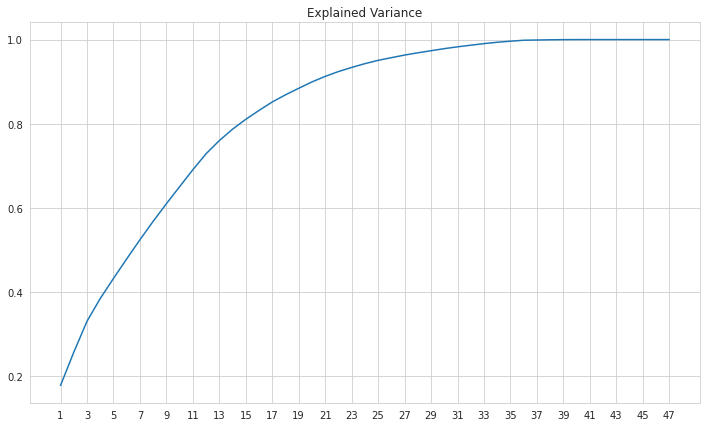

In [104]:
#Has the same roc_auc so lets procced on selecting n_components
n=47
plt.figure(figsize=(12,7))
pipe_svc_pca.fit(X,y)
plt.plot(range(1,n+1),pipe_svc_pca.named_steps['pca'].explained_variance_ratio_.cumsum())
plt.xticks(range(1,n+1,2))
plt.title('Explained Variance')
plt.show()

In [ ]:
#35 show 100% variance so lets choose 35

### Pipeline + PCA

In [108]:
pipe_svc_pca = make_pipeline(prepro_pipe, PCA(n_components=35), SVC(probability=True))
print('SVC with pca :', np.mean(cross_val_score(estimator = pipe_svc_pca,X = X, y=y,cv = skf, scoring='roc_auc')))

SVC with pca : 0.8251267507002801


### Tuning SVC using GridSearchCV

In [121]:
pipe_svc_pca = make_pipeline(prepro_pipe, PCA(n_components=35), SVC(probability=True))
param_grid = {'svc__C': [0.001,0.01, 0.1, 1, 10,100],
              'svc__class_weight' :['balanced', None]}

gridsearch4 = GridSearchCV(estimator=pipe_svc_pca, param_grid=param_grid, scoring='roc_auc', cv=skf)
gridsearch4.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>...
                                            decision_fu

### Finding Best Estimator

In [124]:
gridsearch4.best_estimator_

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                  

In [122]:
gridsearch4.best_params_

{'svc__C': 0.1, 'svc__class_weight': None}

In [123]:
gridsearch4.best_score_

0.8260719537815125

### Test Data and Submission

In [126]:
t = pd.read_csv('test.csv')

In [130]:
best_svc = gridsearch4.best_estimator_
best_svc.fit(X,y)
prediction = best_svc.predict_proba(test_data)[:,1]
submission = pd.DataFrame(prediction,columns=['Attrition'])
submission['Id'] = t.Id
submission = submission[['Id','Attrition']]
submission.to_csv('Submission17.csv', index = None)

In [132]:
submission.head()

,Id,Attrition
0,1,0.015676
1,2,0.034929
2,3,0.104817
3,4,0.098240
4,5,0.008349
